In [17]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu


#### Physical activity

In [2]:
dfPA_treatment = pd.read_csv("data/4.PA_treatment.csv")
dfPA_control = pd.read_csv("data/4.PA_control.csv")
dfPA_balanced = pd.read_csv("data/5.PA_balanced.csv").drop(columns='Treatment')

print("Physical activity Treatment group:", dfPA_treatment.shape)
print("Physical activity Control group:  ", dfPA_control.shape)
print("Physical activity Balanced group: ", dfPA_balanced.shape)

Physical activity Treatment group: (7603, 9)
Physical activity Control group:   (4131, 9)
Physical activity Balanced group:  (4131, 9)


In [3]:
dfPA_balanced

,Age,Gender,BMI,Depression,Employment_status,Baseline_Physical_Activity,Baseline_Quality_of_life,Baseline_Pain,PA_change
0,70.0,1.0,28.9,1.0,1.0,0,81.25,30.0,0
1,77.0,1.0,33.6,1.0,3.0,0,37.50,50.0,3
2,49.0,1.0,23.5,1.0,1.0,0,81.25,20.0,6
3,67.0,2.0,34.7,1.0,3.0,0,62.50,0.0,3
4,56.0,2.0,23.9,1.0,1.0,0,100.00,0.0,5
...,...,...,...,...,...,...,...,...,...
4126,59.0,2.0,30.5,1.0,1.0,9,43.75,70.0,-4
4127,52.0,1.0,30.7,1.0,1.0,9,31.25,50.0,-2
4128,52.0,1.0,30.7,1.0,1.0,9,31.25,50.0,-2
4129,52.0,1.0,30.7,1.0,1.0,9,31.25,50.0,-2


In [4]:
dfPA_control

,Age,Gender,BMI,Depression,Employment_status,Baseline_Physical_Activity,Baseline_Quality_of_life,Baseline_Pain,PA_change
0,78.0,1.0,27.6,1.0,3.0,0,50.00,80.0,0
1,76.0,2.0,27.4,1.0,3.0,0,100.00,0.0,2
2,69.0,1.0,29.8,1.0,3.0,0,81.25,10.0,3
3,68.0,2.0,30.1,2.0,3.0,0,75.00,30.0,0
4,76.0,1.0,32.4,1.0,2.0,0,75.00,30.0,0
...,...,...,...,...,...,...,...,...,...
4126,56.0,1.0,24.1,1.0,1.0,9,100.00,0.0,-1
4127,59.0,2.0,30.5,1.0,1.0,9,43.75,70.0,-4
4128,70.0,1.0,33.9,1.0,3.0,9,100.00,0.0,-5
4129,52.0,1.0,30.7,1.0,1.0,9,31.25,50.0,-2


In [5]:
dfPA_balanced

,Age,Gender,BMI,Depression,Employment_status,Baseline_Physical_Activity,Baseline_Quality_of_life,Baseline_Pain,PA_change
0,70.0,1.0,28.9,1.0,1.0,0,81.25,30.0,0
1,77.0,1.0,33.6,1.0,3.0,0,37.50,50.0,3
2,49.0,1.0,23.5,1.0,1.0,0,81.25,20.0,6
3,67.0,2.0,34.7,1.0,3.0,0,62.50,0.0,3
4,56.0,2.0,23.9,1.0,1.0,0,100.00,0.0,5
...,...,...,...,...,...,...,...,...,...
4126,59.0,2.0,30.5,1.0,1.0,9,43.75,70.0,-4
4127,52.0,1.0,30.7,1.0,1.0,9,31.25,50.0,-2
4128,52.0,1.0,30.7,1.0,1.0,9,31.25,50.0,-2
4129,52.0,1.0,30.7,1.0,1.0,9,31.25,50.0,-2


##### Calculate Chi2:

In [6]:
# Add a new column to identify the group
dfPA_treatment['Group'] = 'Treatment'
dfPA_balanced['Group'] = 'Control'

# Combine the dataframes
df_combined = pd.concat([dfPA_treatment, dfPA_balanced])

# Create a contingency table for PA_change across Treatment and Control groups
contingency_table = pd.crosstab(df_combined['PA_change'], df_combined['Group'])

# Perform chi-squared test
chi2, p, dof, ex = chi2_contingency(contingency_table)

# Display results
print(f"Chi-squared Test for PA_change across Treatment and Control groups")
print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(ex)
print("\nObserved Frequencies:")
print(contingency_table)


Chi-squared Test for PA_change across Treatment and Control groups
Chi2: 125.41515817890827, p-value: 3.959523256415482e-18, Degrees of Freedom: 18

Expected Frequencies:
[[3.52053861e-01 6.47946139e-01]
 [2.11232316e+00 3.88767684e+00]
 [4.57670019e+00 8.42329981e+00]
 [1.61944776e+01 2.98055224e+01]
 [3.16848475e+01 5.83151525e+01]
 [8.30847111e+01 1.52915289e+02]
 [1.69689961e+02 3.12310039e+02]
 [3.36563491e+02 6.19436509e+02]
 [5.99547725e+02 1.10345228e+03]
 [1.25471996e+03 2.30928004e+03]
 [6.72774928e+02 1.23822507e+03]
 [5.00620590e+02 9.21379410e+02]
 [2.46437702e+02 4.53562298e+02]
 [1.26387336e+02 2.32612664e+02]
 [4.89354866e+01 9.00645134e+01]
 [2.04191239e+01 3.75808761e+01]
 [1.19698313e+01 2.20301687e+01]
 [4.22464633e+00 7.77535367e+00]
 [7.04107721e-01 1.29589228e+00]]

Observed Frequencies:
Group      Control  Treatment
PA_change                    
-9               0          1
-8               0          6
-7               2         11
-6              11         3

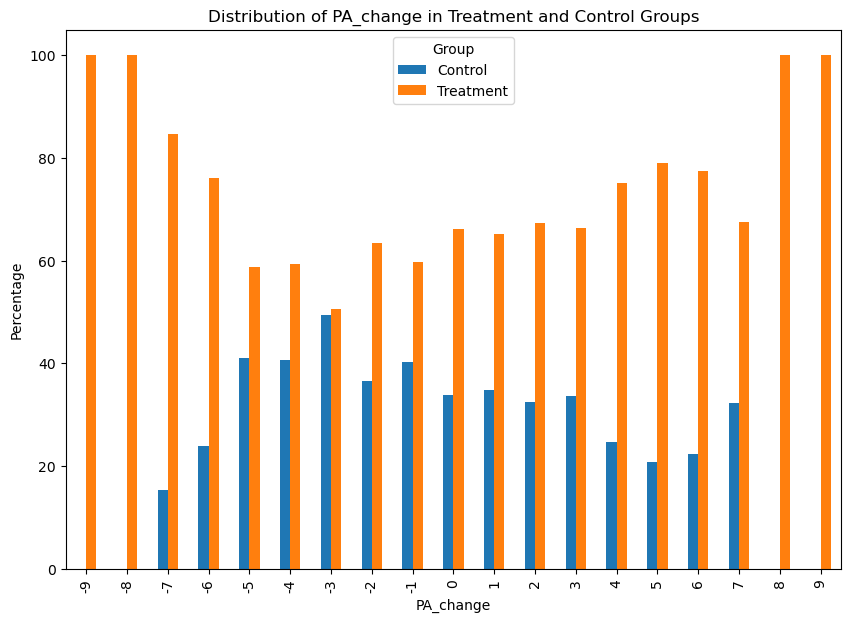

In [7]:
# Add a new column to identify the group
dfPA_treatment['Group'] = 'Treatment'
dfPA_balanced['Group'] = 'Control'

# Combine the dataframes
df_combined = pd.concat([dfPA_treatment, dfPA_balanced])

# Create a contingency table for PA_change across Treatment and Control groups
contingency_table = pd.crosstab(df_combined['PA_change'], df_combined['Group'])

# Normalize the contingency table to get percentages
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Plot the contingency table
contingency_table_percentage.plot(kind='bar', figsize=(10, 7))
plt.title('Distribution of PA_change in Treatment and Control Groups')
plt.xlabel('PA_change')
plt.ylabel('Percentage')
plt.legend(title='Group')
plt.show()


#### Quality of life

In [8]:
dfQ_treatment = pd.read_csv("data/4.QOL_treatment.csv")
dfQ_control = pd.read_csv("data/4.QOL_control.csv")
dfQ_balanced = pd.read_csv("data/5.QOL_balanced.csv")

In [9]:
# List of file paths and corresponding dataframe names
files = [
    ("data/4.QOL_treatment.csv", "dfQ_treatment"),
    ("data/4.QOL_control.csv", "dfQ_control"),
    ("data/5.QOL_balanced.csv", "dfQ_balanced"),
]

# Dictionary to store dataframes
dataframes = {}

# Loop through each file and read the csv into a dataframe, then store it in the dictionary
for file, name in files:
    dataframes[name] = pd.read_csv(file)
    print(f"{name}: {dataframes[name].shape}")

dfQ_treatment: (7603, 9)
dfQ_control: (4131, 9)
dfQ_balanced: (4131, 10)


In [10]:
dfQ_balanced

,Age,Gender,BMI,Depression,Employment_status,Baseline_Physical_Activity,Baseline_Quality_of_life,Baseline_Pain,QOL_change,Treatment
0,78.0,1.0,27.6,1.0,3.0,0,50.00,80.0,18.75,0
1,70.0,1.0,28.9,1.0,1.0,0,81.25,30.0,18.75,0
2,77.0,1.0,33.6,1.0,3.0,0,37.50,50.0,12.50,0
3,49.0,1.0,23.5,1.0,1.0,0,81.25,20.0,-6.25,0
4,67.0,2.0,34.7,1.0,3.0,0,62.50,0.0,6.25,0
...,...,...,...,...,...,...,...,...,...,...
4126,59.0,2.0,30.5,1.0,1.0,9,43.75,70.0,25.00,0
4127,52.0,1.0,30.7,1.0,1.0,9,31.25,50.0,6.25,0
4128,52.0,1.0,30.7,1.0,1.0,9,31.25,50.0,6.25,0
4129,52.0,1.0,30.7,1.0,1.0,9,31.25,50.0,6.25,0


In [11]:
# Add a new column to identify the group
dfQ_treatment['Group'] = 'Treatment'
dfQ_balanced['Group'] = 'Control'

# Combine the dataframes
dfQ_combined = pd.concat([dfQ_treatment, dfQ_balanced])

# Create a contingency table for QOL_change across Treatment and Control groups
contingency_table = pd.crosstab(dfQ_combined['QOL_change'], dfQ_combined['Group'])

# Perform chi-squared test
chi2, p, dof, ex = chi2_contingency(contingency_table)

# Display results
print(f"Chi-squared Test for QOL_change across Treatment and Control groups")
print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(ex)
print("\nObserved Frequencies:")
print(contingency_table)


Chi-squared Test for QOL_change across Treatment and Control groups
Chi2: 115.74869069275903, p-value: 5.214200500280841e-12, Degrees of Freedom: 30

Expected Frequencies:
[[7.04107721e-01 1.29589228e+00]
 [3.52053861e-01 6.47946139e-01]
 [1.05616158e+00 1.94383842e+00]
 [1.40821544e+00 2.59178456e+00]
 [5.28080791e+00 9.71919209e+00]
 [7.04107721e+00 1.29589228e+01]
 [3.20369013e+01 5.89630987e+01]
 [6.23135333e+01 1.14686467e+02]
 [1.36596898e+02 2.51403102e+02]
 [1.40821544e+00 2.59178456e+00]
 [2.51718510e+02 4.63281490e+02]
 [4.29857764e+02 7.91142236e+02]
 [1.05616158e+00 1.94383842e+00]
 [5.97435401e+02 1.09956460e+03]
 [6.15742202e+02 1.13325780e+03]
 [7.04107721e-01 1.29589228e+00]
 [6.12925771e+02 1.12807423e+03]
 [3.52053861e-01 6.47946139e-01]
 [4.66471365e+02 8.58528635e+02]
 [3.29874467e+02 6.07125533e+02]
 [2.06655616e+02 3.80344384e+02]
 [1.76026930e+00 3.23973070e+00]
 [1.52439322e+02 2.80560678e+02]
 [1.02447673e+02 1.88552327e+02]
 [5.06957559e+01 9.33042441e+01]
 [2

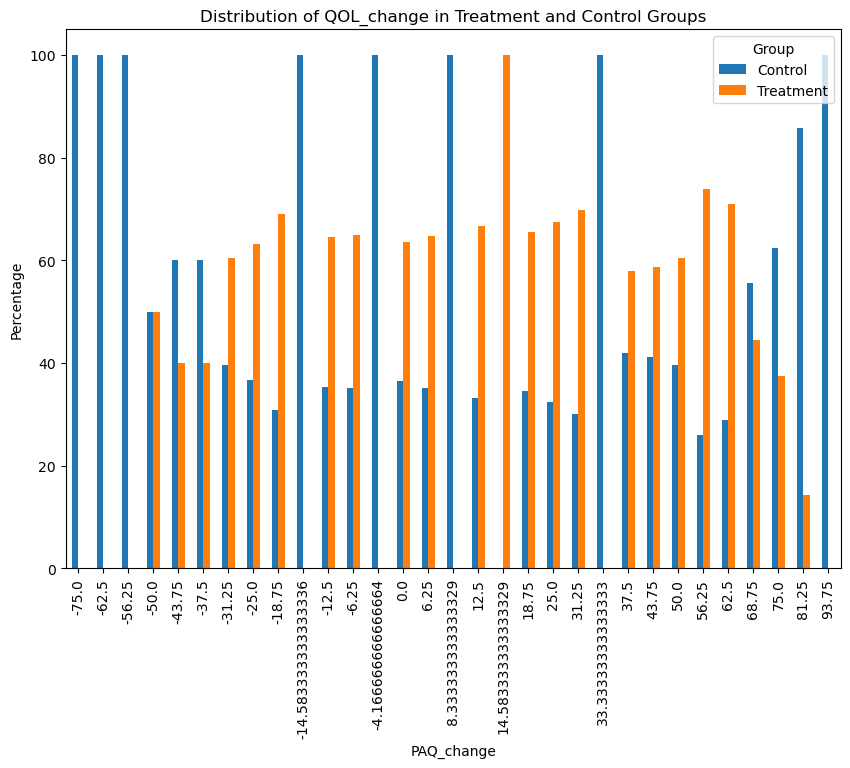

In [12]:
# Add a new column to identify the group
dfQ_treatment['Group'] = 'Treatment'
dfQ_balanced['Group'] = 'Control'

# Combine the dataframes
df_combined = pd.concat([dfQ_treatment, dfQ_balanced])

# Create a contingency table for QOL_change across Treatment and Control groups
contingency_table = pd.crosstab(df_combined['QOL_change'], df_combined['Group'])

# Normalize the contingency table to get percentages
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Plot the contingency table
contingency_table_percentage.plot(kind='bar', figsize=(10, 7))
plt.title('Distribution of QOL_change in Treatment and Control Groups')
plt.xlabel('PAQ_change')
plt.ylabel('Percentage')
plt.legend(title='Group')
plt.show()


#### Pain

In [13]:
dfpain_treatment = pd.read_csv("data/4.Pain_treatment.csv")
dfpain_control = pd.read_csv("data/4.Pain_control.csv")
dfpain_balanced = pd.read_csv("data/5.Pain_balanced.csv")

In [14]:
# List of file paths and corresponding dataframe names
files = [
    ("data/4.Pain_treatment.csv", "dfpain_treatment"),
    ("data/4.Pain_control.csv", "dfpain_control"),
    ("data/5.Pain_balanced.csv", "dfpain_balanced")
]

# Dictionary to store dataframes
dataframes = {}

# Loop through each file and read the csv into a dataframe, then store it in the dictionary
for file, name in files:
    dataframes[name] = pd.read_csv(file)
    print(f"{name}: {dataframes[name].shape}")


dfpain_treatment: (7603, 9)
dfpain_control: (4131, 9)
dfpain_balanced: (4131, 10)


In [15]:
# Add a new column to identify the group
dfpain_treatment['Group'] = 'Treatment'
dfpain_balanced['Group'] = 'Control'

# Combine the dataframes
dfpain_combined = pd.concat([dfpain_treatment, dfpain_balanced])

# Create a contingency table for pain_change across Treatment and Control groups
contingency_table = pd.crosstab(dfpain_combined['pain_change'], dfpain_combined['Group'])

# Perform chi-squared test
chi2, p, dof, ex = chi2_contingency(contingency_table)

# Display results
print(f"Chi-squared Test for pain_change across Treatment and Control groups")
print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(ex)
print("\nObserved Frequencies:")
print(contingency_table)


Chi-squared Test for pain_change across Treatment and Control groups
Chi2: 8923.230956206175, p-value: 0.0, Degrees of Freedom: 169

Expected Frequencies:
[[4.57670019e+00 8.42329981e+00]
 [7.04107721e-01 1.29589228e+00]
 [3.52053861e-01 6.47946139e-01]
 [7.04107721e-01 1.29589228e+00]
 [3.52053861e-01 6.47946139e-01]
 [1.76026930e+00 3.23973070e+00]
 [7.04107721e-01 1.29589228e+00]
 [7.04107721e-01 1.29589228e+00]
 [1.05616158e+00 1.94383842e+00]
 [3.52053861e-01 6.47946139e-01]
 [2.46437702e+00 4.53562298e+00]
 [2.11232316e+00 3.88767684e+00]
 [1.40821544e+00 2.59178456e+00]
 [1.05616158e+00 1.94383842e+00]
 [1.76026930e+00 3.23973070e+00]
 [9.85750810e+00 1.81424919e+01]
 [2.11232316e+00 3.88767684e+00]
 [3.16848475e+00 5.83151525e+00]
 [3.16848475e+00 5.83151525e+00]
 [3.87259247e+00 7.12740753e+00]
 [2.81643088e+00 5.18356912e+00]
 [4.22464633e+00 7.77535367e+00]
 [4.92875405e+00 9.07124595e+00]
 [4.57670019e+00 8.42329981e+00]
 [3.87259247e+00 7.12740753e+00]
 [1.58424237e+01 2.9

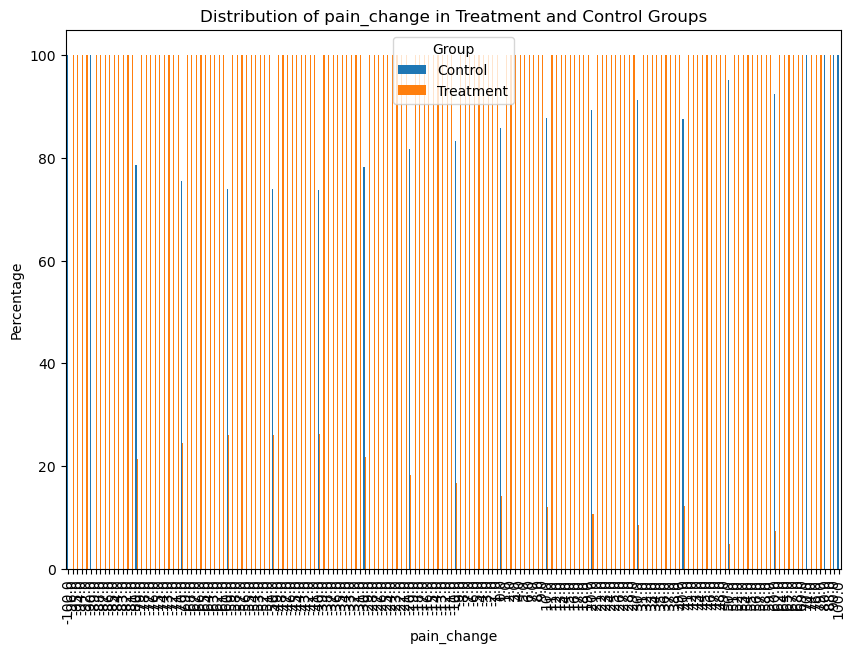

In [16]:
# Add a new column to identify the group
dfpain_treatment['Group'] = 'Treatment'
dfpain_balanced['Group'] = 'Control'

# Combine the dataframes
dfpain_combined = pd.concat([dfpain_treatment, dfpain_balanced])

# Create a contingency table for pain_change across Treatment and Control groups
contingency_table = pd.crosstab(dfpain_combined['pain_change'], dfpain_combined['Group'])

# Normalize the contingency table to get percentages
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Plot the contingency table
contingency_table_percentage.plot(kind='bar', figsize=(10, 7))
plt.title('Distribution of pain_change in Treatment and Control Groups')
plt.xlabel('pain_change')
plt.ylabel('Percentage')
plt.legend(title='Group')
plt.show()
